Importing relevant libraries for data wrangling

In [141]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [143]:
df_baseline = pd.DataFrame()
cols_list_baseline = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_baseline.append(i)

df_baseline_row_times = []
for i in range(0, 2588400, 3600):
    df_baseline_row_times.append(i)

name_loc_in_csv = []
for i in range(4, 419, 7):
    name_loc_in_csv.append(i)

def prde_profit(row):
    """Function to calculate profit of PRDE at each time interval 3600"""
    return row[row.index.str.contains("PRDE")].sum()

def prade_profit(row):
    """Function to calculate profit of PRADE at each time interval 3600"""
    return row[row.index.str.contains("PRADE")].sum()

df_profit_PRDE = pd.DataFrame()
df_profit_PRADE = pd.DataFrame()
n = 20
for i in range(n):
    new_col_names = []
    new_col_names.append(pd.read_csv("PRADE_v_PRDE_" + str(i) + "_strats.csv", header=None, usecols=name_loc_in_csv))
    df_new_col_names = pd.concat(new_col_names)  # Easier to manipulate DataFrame than List
    df_new_col_names.drop(df_new_col_names.index.tolist()[1:], axis=0, inplace=True)
    df_new_col_names.columns = [i for i in range(60)]

    test_data_i = []
    test_data_i.append(pd.read_csv("PRADE_v_PRDE_" + str(i) + "_strats.csv", header=None, usecols=cols_list_baseline))
    df_test_data_i = pd.concat(test_data_i)
    df_test_data_i.set_index(1, inplace=True)
    df_test_data_i.columns = [i for i in range(60)]

    df_profit_i = pd.concat([df_new_col_names, df_test_data_i])
    df_profit_i.columns = df_profit_i.iloc[0]  # Setting the column names to equal the first column
    df_profit_i = df_profit_i.iloc[1:]  # Dropping first column

    df_profit_PRDE[f"Total PRDE PPS {i}"] = df_profit_i.apply(prde_profit, axis=1)
    df_profit_PRADE[f"Total PRADE PPS {i}"] = df_profit_i.apply(prade_profit, axis=1)

#df_baseline["Mean PPS"] = df_baseline.sum(axis=1) / 10
df_profit_PRDE["Mean PPS"] = df_profit_PRDE.sum(axis=1) / n
df_profit_PRADE["Mean PPS"] = (df_profit_PRADE.sum(axis=1)) / n
#df_profit_PRADE["Diff %"] = (df_profit_PRADE["Mean PPS"] - df_profit_PRDE["Mean PPS"]) * 100 / df_profit_PRDE["Mean PPS"]

df_profit_PRDE

,Total PRDE PPS 0,Total PRDE PPS 1,Total PRDE PPS 2,Total PRDE PPS 3,Total PRDE PPS 4,Total PRDE PPS 5,Total PRDE PPS 6,Total PRDE PPS 7,Total PRDE PPS 8,Total PRDE PPS 9,...,Total PRDE PPS 11,Total PRDE PPS 12,Total PRDE PPS 13,Total PRDE PPS 14,Total PRDE PPS 15,Total PRDE PPS 16,Total PRDE PPS 17,Total PRDE PPS 18,Total PRDE PPS 19,Mean PPS
1,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
3600,26.745435,27.014998,22.344443,27.330834,19.394165,21.453335,26.724323,25.659445,25.378056,29.546112,...,27.027376,30.355693,21.484722,23.791388,31.270002,21.333890,17.425554,22.291385,25.748890,25.048516
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,24.388890,27.305553,28.699311,21.720933,19.417410,17.042223,26.075278,22.662326,24.521553,26.592622,...,24.486830,33.459812,20.282223,26.029998,29.345142,20.926572,21.903890,21.883888,21.891944,24.164839
14400,24.209443,27.442917,28.656527,21.880745,0.000000,17.215556,0.000000,22.479497,24.575138,26.689505,...,24.501529,33.480972,0.000000,26.008334,29.000973,20.820275,0.000000,0.000000,21.943612,18.658011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574000,31.725333,33.134784,28.529746,24.733679,25.736802,24.069380,28.292902,32.022016,31.802502,36.577816,...,35.061497,46.425324,24.220032,28.374695,36.061487,22.727187,26.454997,26.607416,28.889908,30.114387
2577600,31.690615,32.955069,28.470771,24.864692,25.854603,24.260239,28.246534,31.984787,31.840745,36.795330,...,34.803044,46.398776,24.122203,28.467177,35.984120,22.717195,26.449622,26.352269,29.121346,30.116310
2581200,31.246842,32.613375,32.871644,28.593612,24.464680,24.026729,29.386970,31.400141,27.994318,36.834275,...,34.285714,44.161044,28.539748,30.050407,35.615652,22.263553,24.127282,30.775650,31.344995,30.515860
2584800,31.258510,32.476237,32.961062,28.606617,24.517515,23.933452,29.420399,31.324141,27.956970,36.859443,...,33.993525,43.944585,28.679641,30.132528,35.736338,22.166528,24.147580,30.589611,31.376696,30.486968


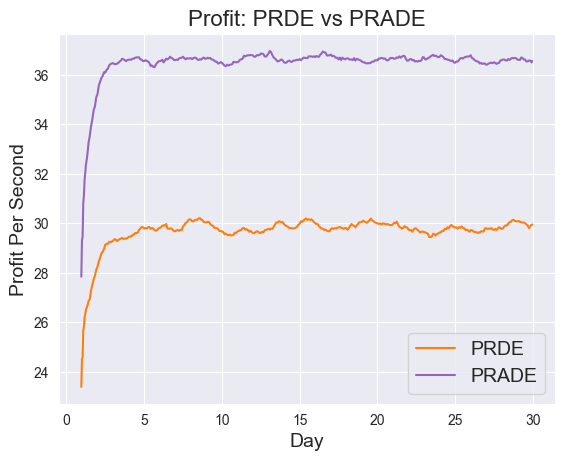

In [144]:
plt.plot((df_profit_PRDE.index / (60*60*24)), df_profit_PRDE["Mean PPS"].rolling(24).mean(), color="tab:orange",
         label="PRDE", alpha=1)
plt.plot((df_profit_PRADE.index / (60*60*24)), df_profit_PRADE["Mean PPS"].rolling(24).mean(), color="tab:purple",
         label="PRADE", alpha=1)

plt.xlabel("Day", fontsize=14)
plt.ylabel("Profit Per Second", fontsize=14)
plt.title("Profit: PRDE vs PRADE", fontsize=16)

plt.legend(fontsize=14, loc="lower right")
plt.savefig("PRDE_v_PRADE_PPS_1.png")
plt.show()


In [145]:
# Statistical Testing
PRADE_means = df_profit_PRADE.mean(axis=0)
PRADE_means = PRADE_means.reset_index(drop=True)
PRDE_means = df_profit_PRDE.mean(axis=0)
PRDE_means = PRDE_means.reset_index(drop=True)
stats_df = pd.DataFrame({'PRDE': PRDE_means, 'PRADE': PRADE_means})

new_labels = []
for i in range(n):
    index = f"Run {i} Mean PPS"
    new_labels.append(index)



stats_df.drop(index=n, inplace=True)
stats_df.index = new_labels
stats_df

,PRDE,PRADE
Run 0 Mean PPS,29.727192,36.230408
Run 1 Mean PPS,32.447091,33.091948
Run 2 Mean PPS,31.965692,34.009995
Run 3 Mean PPS,28.166321,37.964196
Run 4 Mean PPS,24.342601,41.478317
Run 5 Mean PPS,22.998543,43.478488
Run 6 Mean PPS,30.061025,35.970447
Run 7 Mean PPS,28.559505,37.096715
Run 8 Mean PPS,30.286140,34.366517
Run 9 Mean PPS,36.141164,29.560011


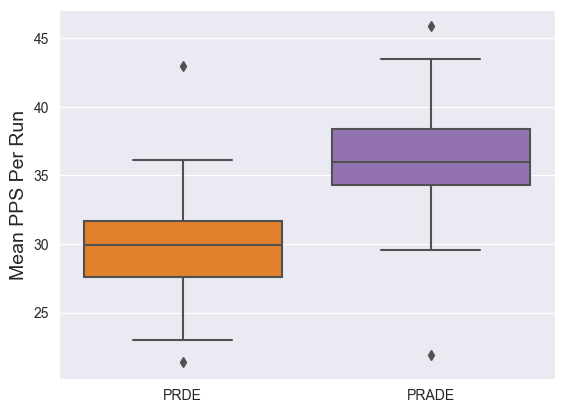

In [146]:
# Visualising with a boxplot
colour_dict = {"PRDE": "tab:orange", "PRADE": "tab:purple"}
BWP = sns.boxplot(data=stats_df, palette=colour_dict)
BWP.set_ylabel("Mean PPS Per Run", fontsize=14)
plt.savefig("Box_and_Whisker_PRADE_1.png")

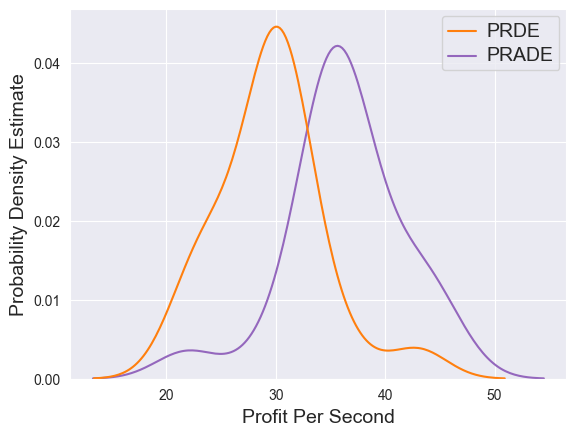

In [147]:
KDE = sns.kdeplot(data=stats_df, legend=True, palette=colour_dict)
KDE.set_ylabel("Probability Density Estimate", fontsize=14)
KDE.set_xlabel("Profit Per Second", fontsize=14)
plt.setp(KDE.get_legend().get_texts(), fontsize="14")
plt.savefig("Kernel_Density_Plot_PRADE_1.png")

In [148]:
# Testing for Normality with Shapiro-Wilk test
for col in stats_df.columns:
    SWstatistic, SWpvalue = stats.shapiro(stats_df[col])
    print(f"SW: {col} data is Normally Distributed") if SWpvalue > 0.05 else print(f"SW: {col} data is Not Normally Distributed")

# Confirming Shapiro-Wilk results with Kolmogorov-Smirnov test
for col in stats_df.columns:
    normal_data = (stats_df[col] - stats_df[col].mean())/stats_df[col].std()
    KSstatistic, KSpvalue = stats.kstest(normal_data, "norm")
    print(f"KS: {col} data is Normally Distributed") if KSpvalue > 0.05 else print(f"KS: {col} data is Not Normally Distributed")


SW: PRDE data is Normally Distributed
SW: PRADE data is Normally Distributed
KS: PRDE data is Normally Distributed
KS: PRADE data is Normally Distributed


In [149]:
statistic, pvalue = stats.ttest_ind(stats_df["PRDE"], stats_df["PRADE"])
stmnt1 = f"T-test: PRDE/PRADE (pvalue= {pvalue} < 0.05). Reject that these samples have identical mean"  # Different
stmnt2 = f"T-test: PRDE/PRADE (pvalue= {pvalue} > 0.05). Can't reject that these have identical mean"  # Same
print(stmnt1) if pvalue < 0.05 else print(stmnt2)

T-test: PRDE/PRADE (pvalue= 0.00014367378370492559 < 0.05). Reject that these samples have identical mean
